In [1]:
from collections import Counter
from itertools import takewhile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# data = [1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 5, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8, 9, 9, 11, 11, 11, 11, 11, 11, 12, 12, 12,
#        12, 12, 12, 13, 13, 14]
# data = [1, 2, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 8, 8, 9, 9]
# data = [531, 998, 426, 379, 616, 998, 998, 998, 379, 616, 998, 531, 616, 910, 835, 910, 835, 910, 379, 998, 666, 666, 998, 666, 998, 666, 835, 998, 616, 998, 998, 998, 616, 379, 998, 910, 426, 379, 379, 426, 379, 426, 616, 835, 379, 998, 531, 616, 998, 531, 616, 998]
data = [350, 341, 341, 347, 351, 340, 345, 351, 345, 350, 346, 345, 350, 271, 340, 347, 271, 341, 346, 351, 340, 351, 347, 271, 341, 346, 350, 351, 351, 351, 342, 345, 345, 346, 347, 342, 271, 350, 342, 351, 342, 340, 341, 346, 340, 271, 342, 347, 351, 351]
data.sort()

In [3]:
freq = Counter(data)
mostfreq = freq.most_common()
mostfreq

[(351, 10),
 (271, 5),
 (340, 5),
 (341, 5),
 (342, 5),
 (345, 5),
 (346, 5),
 (347, 5),
 (350, 5)]

In [5]:
# modes = list(takewhile(lambda x_f: x_f[1] == mostfreq[0][1], mostfreq))
# modes

In [6]:
# mostfreq.reverse()
# mostfreq

In [7]:
# less = list(takewhile(lambda x_f: x_f[1] == mostfreq[0][1], mostfreq))
# less

In [8]:
df = pd.DataFrame(data, columns = ['valores'])
df.describe()

,valores
count,52.000000
mean,719.230769
std,240.541922
min,379.000000
25%,531.000000
50%,666.000000
75%,998.000000
max,998.000000


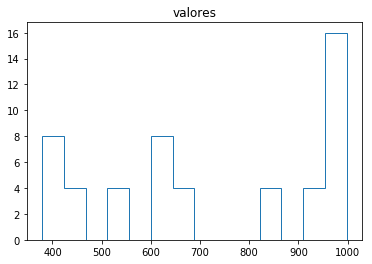

In [36]:
# fig = plt.figure()
ax = df.hist(histtype='step',grid=0,bins=14)

In [37]:
fig = ax.
fig.savefig('plot.png', dpi=200)

AttributeError: 'numpy.ndarray' object has no attribute 'get_figure'

In [10]:
moda = mostfreq[0]
picos_iniciais = [moda]
picos_iniciais

[(998, 16)]

In [11]:
for i in mostfreq[1:]: # ignora o primeiro
    if i[1] >= 0.7*moda[1]: # se a frequência for maior ou igual a 70% do maior, é outro pico
        picos_iniciais.append(i)

In [12]:
picos_iniciais

[(998, 16)]

In [13]:
# É preciso filtrar os picos pela vizinhança: só é um pico mesmo se existe um valor que não é um pico entre
# os picos
picos = [picos_iniciais[0]] # o primeiro é sempre um pico
for i in range(len(picos_iniciais)-1):
    for j in mostfreq:
        if j[0] > picos_iniciais[i][0] and j[0] < picos_iniciais[i+1][0]: # existe alguém que não é um pico entre os picos
            picos.append(picos_iniciais[i+1])
            break

In [14]:
picos

[(998, 16)]

In [15]:
# Definindo o ponto de corte entre dois picos
def ponto_corte(pico1, pico2):
    corte = 100000,100000
    for i in mostfreq:
        if i[0] >= pico1[0] and i[0] <= pico2[0]:
            if i[1] < corte[1]:
                corte = i
    return corte

In [16]:
# Divide um array em dois em um ponto de valor específico
def dividir(arr, valor):
    return arr[arr<valor], arr[~(arr<valor)]

In [17]:
entrada = np.array(data)
if len(picos) > 1: # se tiver mais de um pico, é preciso definir o(s) ponto(s) de corte
    corte = []
    for i in range(len(picos)-1):
        pico1 = picos[i]
        pico2 = picos[i+1]
        corte.append(ponto_corte(pico1,pico2)) # definição do(s) ponto(s) de corte
    # subdivisão do array de entrada no(s) ponto(s) de corte
    num_cortes = len(corte)
    histogramas = []
    for i in range(num_cortes):
        trecho_entrada,entrada = dividir(entrada,corte[i][0])
        histogramas.append(trecho_entrada)
    histogramas.append(entrada)
else: # se tiver só um pico, retorna a própria entrada
    histogramas.append(entrada)

In [25]:
histogramas

[array([1, 2, 3, 4, 4, 4, 4, 4, 4, 4]),
 array([5, 6, 7, 7, 8, 8, 8, 8, 8, 8, 8]),
 array([ 9,  9, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 14])]